In [ ]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib_inline
import matplotlib.pyplot as plt


In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Utilizando o biblioteca yfinnance para extração dos dados

Agora podemos extrair os dados

Utilizando o **info** podemos extrair informações em formato de dicionario no Python

## Extrair os preços das ações

Utilizando o metodo *history()* podemos obter os preços em um determinado periodo de tempo, para escolher esse periodo utiliza-se as seguintes opções

- Por dia
    *   1 dia (1d)
    *   5 dias (5d);


- Por mês
    *   1 mês (1mo);
    *   3 meses (3mo);
    * 6 meses (6mo)

- Por ano:
    * 1 ano (1y);
    * 2 anos (2y);
    * 5 anos (5y);
    * 10 anos (10y);

ytd = Ano até o dia atual e max = pegar todas as datas ate o mês atual




### Extraindo os dados da AMD

In [ ]:
amd = yf.Ticker("AMD")

In [ ]:
amd_share_price_data = amd.history(period="max")

In [ ]:
amd_share_price_data.head()

Open      High       Low     Close  Volume  \
Date                                                                    
1980-03-17 00:00:00-05:00   0.0  3.302083  3.125000  3.145833  219600   
1980-03-18 00:00:00-05:00   0.0  3.125000  2.937500  3.031250  727200   
1980-03-19 00:00:00-05:00   0.0  3.083333  3.020833  3.041667  295200   
1980-03-20 00:00:00-05:00   0.0  3.062500  3.010417  3.010417  159600   
1980-03-21 00:00:00-05:00   0.0  3.020833  2.906250  2.916667  130800   

                           Dividends  Stock Splits  
Date                                                
1980-03-17 00:00:00-05:00        0.0           0.0  
1980-03-18 00:00:00-05:00        0.0           0.0  
1980-03-19 00:00:00-05:00        0.0           0.0  
1980-03-20 00:00:00-05:00        0.0           0.0  
1980-03-21 00:00:00-05:00        0.0           0.0

In [ ]:
amd_share_price_data.reset_index(inplace=True)

<Axes: xlabel='Date'>

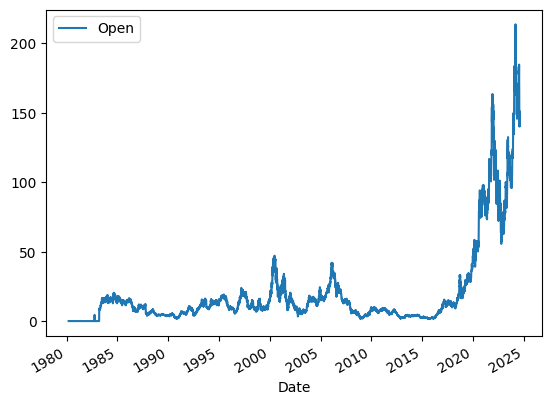

In [ ]:
amd_share_price_data.plot(x='Date', y='Open')

In [ ]:
# Criando o gráfico de candlestick
fig = go.Figure(data=[go.Candlestick(
    x=amd_share_price_data['Date'],
    open=amd_share_price_data['Open'],
    high=amd_share_price_data['High'],
    low=amd_share_price_data['Low'],
    close=amd_share_price_data['Close'],
    name='Candlestick'
)])

# Atualizando o layout
fig.update_layout(
    title='Gráfico de Candlestick',
    xaxis_title='Data',
    yaxis_title='Preço',
    xaxis_rangeslider_visible=False
)

# Exibindo o gráfico
fig.show()

In [ ]:
fig = go.Figure()

# Adicionando a área para o preço de fechamento
fig.add_trace(go.Scatter(
    x=amd_share_price_data['Date'],
    y=amd_share_price_data['Close'],
    fill='tozeroy',  # Preencher a área até o eixo Y
    mode='none',     # Não mostrar linhas ou pontos
    name='Preço de Fechamento',
    fillcolor='rgba(135, 206, 250, 0.5)'  # Cor de preenchimento
))

# Adicionando linhas para o preço de abertura, máximo e mínimo
fig.add_trace(go.Scatter(
    x=amd_share_price_data['Date'],
    y=amd_share_price_data['Open'],
    mode='lines',
    name='Preço de Abertura',
    line=dict(color='orange')
))

fig.add_trace(go.Scatter(
    x=amd_share_price_data['Date'],
    y=amd_share_price_data['High'],
    mode='lines',
    name='Preço Mais Alto',
    line=dict(color='green')
))

fig.add_trace(go.Scatter(
    x=amd_share_price_data['Date'],
    y=amd_share_price_data['Low'],
    mode='lines',
    name='Preço Mais Baixo',
    line=dict(color='red')
))

# Atualizando o layout
fig.update_layout(
    title='Gráfico de Área dos Preços de Ações',
    xaxis_title='Data',
    yaxis_title='Preço',
    xaxis_rangeslider_visible=False
)

# Exibindo o gráfico
fig.show()

### Extrair dados da Amazon

In [ ]:
amazon = yf.Ticker('AMZN')

In [ ]:
amazon_share_price_data = amazon.history(period='max')

In [ ]:
amazon_share_price_data.head()

Open      High       Low     Close      Volume  \
Date                                                                            
1997-05-15 00:00:00-04:00  0.121875  0.125000  0.096354  0.097917  1443120000   
1997-05-16 00:00:00-04:00  0.098438  0.098958  0.085417  0.086458   294000000   
1997-05-19 00:00:00-04:00  0.088021  0.088542  0.081250  0.085417   122136000   
1997-05-20 00:00:00-04:00  0.086458  0.087500  0.081771  0.081771   109344000   
1997-05-21 00:00:00-04:00  0.081771  0.082292  0.068750  0.071354   377064000   

                           Dividends  Stock Splits  
Date                                                
1997-05-15 00:00:00-04:00        0.0           0.0  
1997-05-16 00:00:00-04:00        0.0           0.0  
1997-05-19 00:00:00-04:00        0.0           0.0  
1997-05-20 00:00:00-04:00        0.0           0.0  
1997-05-21 00:00:00-04:00        0.0           0.0

In [ ]:
amazon_share_price_data.reset_index(inplace=True)

<Axes: xlabel='Date'>

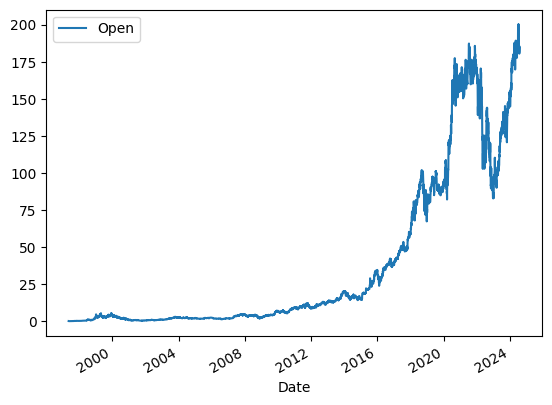

In [ ]:
amazon_share_price_data.plot(x='Date', y='Open')

In [ ]:
# Criando o gráfico de candlestick
fig = go.Figure(data=[go.Candlestick(
    x=amazon_share_price_data['Date'],
    open=amazon_share_price_data['Open'],
    high=amazon_share_price_data['High'],
    low=amazon_share_price_data['Low'],
    close=amazon_share_price_data['Close'],
    name='Candlestick'
)])

# Atualizando o layout
fig.update_layout(
    title='Gráfico de Candlestick',
    xaxis_title='Data',
    yaxis_title='Preço',
    xaxis_rangeslider_visible=False
)

# Exibindo o gráfico
fig.show()

In [ ]:
fig = go.Figure()

# Adicionando a área para o preço de fechamento
fig.add_trace(go.Scatter(
    x=amazon_share_price_data['Date'],
    y=amazon_share_price_data['Close'],
    fill='tozeroy',  # Preencher a área até o eixo Y
    mode='none',     # Não mostrar linhas ou pontos
    name='Preço de Fechamento',
    fillcolor='rgba(135, 206, 250, 0.5)'  # Cor de preenchimento
))

# Adicionando linhas para o preço de abertura, máximo e mínimo
fig.add_trace(go.Scatter(
    x=amazon_share_price_data['Date'],
    y=amazon_share_price_data['Open'],
    mode='lines',
    name='Preço de Abertura',
    line=dict(color='orange')
))

fig.add_trace(go.Scatter(
    x=amazon_share_price_data['Date'],
    y=amazon_share_price_data['High'],
    mode='lines',
    name='Preço Mais Alto',
    line=dict(color='green')
))

fig.add_trace(go.Scatter(
    x=amazon_share_price_data['Date'],
    y=amazon_share_price_data['Low'],
    mode='lines',
    name='Preço Mais Baixo',
    line=dict(color='red')
))

# Atualizando o layout
fig.update_layout(
    title='Gráfico de Área dos Preços de Ações',
    xaxis_title='Data',
    yaxis_title='Preço',
    xaxis_rangeslider_visible=False
)

# Exibindo o gráfico
fig.show()

### Extração dos dados da GameStop

In [ ]:
gamestop = yf.Ticker('GME')

In [ ]:
gamestop_share_price_date = gamestop.history(period='max')

In [ ]:
gamestop_share_price_date.head()

Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0

In [ ]:
gamestop_share_price_date.reset_index(inplace=True)

<Axes: xlabel='Date'>

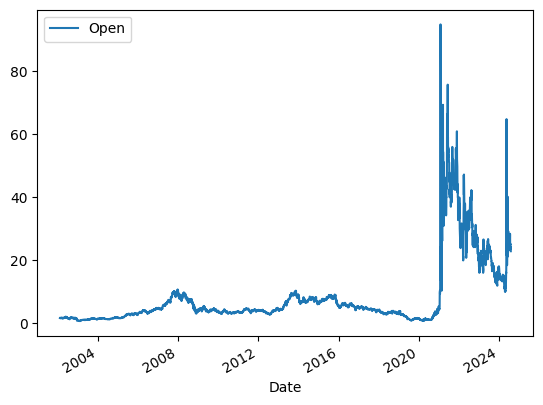

In [ ]:
gamestop_share_price_date.plot(x='Date', y='Open')

In [ ]:
# Criando o gráfico de candlestick
fig = go.Figure(data=[go.Candlestick(
    x=gamestop_share_price_date['Date'],
    open=gamestop_share_price_date['Open'],
    high=gamestop_share_price_date['High'],
    low=gamestop_share_price_date['Low'],
    close=gamestop_share_price_date['Close'],
    name='Candlestick'
)])

# Atualizando o layout
fig.update_layout(
    title='Gráfico de Candlestick',
    xaxis_title='Data',
    yaxis_title='Preço',
    xaxis_rangeslider_visible=False
)

# Exibindo o gráfico
fig.show()

In [ ]:
fig = go.Figure()

# Adicionando a área para o preço de fechamento
fig.add_trace(go.Scatter(
    x=gamestop_share_price_date['Date'],
    y=gamestop_share_price_date['Close'],
    fill='tozeroy',  # Preencher a área até o eixo Y
    mode='none',     # Não mostrar linhas ou pontos
    name='Preço de Fechamento',
    fillcolor='rgba(135, 206, 250, 0.5)'  # Cor de preenchimento
))

# Adicionando linhas para o preço de abertura, máximo e mínimo
fig.add_trace(go.Scatter(
    x=gamestop_share_price_date['Date'],
    y=gamestop_share_price_date['Open'],
    mode='lines',
    name='Preço de Abertura',
    line=dict(color='orange')
))

fig.add_trace(go.Scatter(
    x=gamestop_share_price_date['Date'],
    y=gamestop_share_price_date['High'],
    mode='lines',
    name='Preço Mais Alto',
    line=dict(color='green')
))

fig.add_trace(go.Scatter(
    x=gamestop_share_price_date['Date'],
    y=gamestop_share_price_date['Low'],
    mode='lines',
    name='Preço Mais Baixo',
    line=dict(color='red')
))

# Atualizando o layout
fig.update_layout(
    title='Gráfico de Área dos Preços de Ações',
    xaxis_title='Data',
    yaxis_title='Preço',
    xaxis_rangeslider_visible=False
)

# Exibindo o gráfico
fig.show()

### Estração Dados Tesla

In [ ]:
tesla = yf.Ticker("TSLA")

In [ ]:
tesla_data = tesla.history(period="max")

In [ ]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0

<Axes: xlabel='Date'>

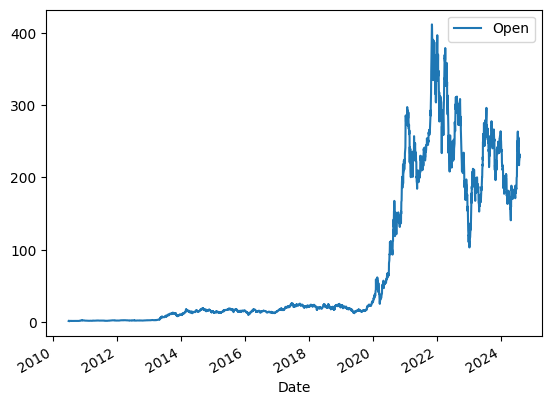

In [ ]:
tesla_data.plot(x='Date', y='Open')

In [ ]:
# Criando o gráfico de candlestick
fig = go.Figure(data=[go.Candlestick(
    x=tesla_data['Date'],
    open=tesla_data['Open'],
    high=tesla_data['High'],
    low=tesla_data['Low'],
    close=tesla_data['Close'],
    name='Candlestick'
)])

# Atualizando o layout
fig.update_layout(
    title='Gráfico de Candlestick',
    xaxis_title='Data',
    yaxis_title='Preço',
    xaxis_rangeslider_visible=False
)

# Exibindo o gráfico
fig.show()

In [ ]:
fig = go.Figure()

# Adicionando a área para o preço de fechamento
fig.add_trace(go.Scatter(
    x=tesla_data['Date'],
    y=tesla_data['Close'],
    fill='tozeroy',  # Preencher a área até o eixo Y
    mode='none',     # Não mostrar linhas ou pontos
    name='Preço de Fechamento',
    fillcolor='rgba(135, 206, 250, 0.5)'  # Cor de preenchimento
))

# Adicionando linhas para o preço de abertura, máximo e mínimo
fig.add_trace(go.Scatter(
    x=tesla_data['Date'],
    y=tesla_data['Open'],
    mode='lines',
    name='Preço de Abertura',
    line=dict(color='orange')
))

fig.add_trace(go.Scatter(
    x=tesla_data['Date'],
    y=tesla_data['High'],
    mode='lines',
    name='Preço Mais Alto',
    line=dict(color='green')
))

fig.add_trace(go.Scatter(
    x=tesla_data['Date'],
    y=tesla_data['Low'],
    mode='lines',
    name='Preço Mais Baixo',
    line=dict(color='red')
))

# Atualizando o layout
fig.update_layout(
    title='Gráfico de Área dos Preços de Ações',
    xaxis_title='Data',
    yaxis_title='Preço',
    xaxis_rangeslider_visible=False
)

# Exibindo o gráfico
fig.show()

## Utilizando o WebScraping

Com o Web Scraping é uma ferramenta poderosa para extrair informações de páginas web, neste caso vamos extrair os dados de duas empresa: **Tesla e do GameStop**.
Os dados extraidos serão a receita e o lucro ou prejuizo de cada uma das empresas informadas acima.


### GameStop

In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [ ]:
html_data = requests.get(url).text

In [ ]:
soup = BeautifulSoup(html_data, 'html.parser')

In [ ]:
tables = soup.find_all('table')

In [ ]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])


for table in tables:
    if "GameStop Quarterly Revenue" in table.get_text():
        tbody = table.find('tbody')

        for row in tbody.find_all('tr'):
            columns = row.find_all('td')
            if columns:
                date = columns[0].get_text()
                revenue = columns[1].get_text()


                revenue = revenue.replace('$', '').replace(',', '')


                new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
                gme_revenue = pd.concat([gme_revenue, new_row], ignore_index=True)



In [ ]:
gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

In [ ]:
gme_revenue.tail()

Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709

### Tesla

In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [ ]:
html_data = requests.get(url).text

In [ ]:
soup = BeautifulSoup(html_data,"html5lib")

In [ ]:
tables = soup.find_all('table')

In [ ]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [ ]:
for table in tables:
    if "Tesla Quarterly Revenue" in table.get_text():

        for row in table.find_all('tr')[1:]:
            columns = row.find_all('td')
            if columns:
                date = columns[0].get_text()
                revenue = columns[1].get_text()


                revenue = revenue.replace('$', '').replace(',', '')


                new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
                tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)

In [ ]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [ ]:
tesla_revenue.tail()

Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27

## Painéis de Comparação

Comparativo das ações com a saúde financeira das Empresas

### GameStop

In [ ]:
make_graph(gamestop_share_price_date, gme_revenue, 'GameStop')

### Tesla

In [ ]:
make_graph(tesla_data, tesla_revenue, 'Tesla')